#                          KEN AGBO DATA SOLUTION TECHNOLOGY

## PROJECT TITTLE: ANALYSIS OF LAPTOP RETAIL DATA FOR SALES IMPROVEMENT

#### SOURCE OF DATA: www.kaggle.com

Project description: this project was designed to target computer retailing business for the purpose of sales optimisation. 

## Analyst: Ken Ugochukwu Agbo
Email: kenagbo@gmail.com

## Data descriptions:
Rows: 1146
columns: 19

column descriptions:

Company: The brand or manufacturer of the laptop (e.g., HP, Acer, Asus).

Product: The model name or identifier of the laptop.

TypeName: The type of laptop (e.g., Notebook, Ultrabook).

Inches: The screen size of the laptop in inches.

ScreenResolution: The resolution of the laptop screen (e.g., Full HD 1920x1080).

Ram: The amount of RAM (memory) in the laptop, typically measured in GB (e.g., 8GB, 16GB).

OpSys: The operating system installed on the laptop (e.g., Windows 10, No OS).

Cpu Brand: The brand of the CPU (processor) used in the laptop (e.g., Intel, AMD).

Cpu Model: The specific model of the CPU (e.g., Core i5 7200U, A9-Series 9420).

Cpu Rate: The clock speed of the CPU, usually measured in GHz (e.g., 2.5GHz, 3GHz).

SSD: The size of the Solid-State Drive (SSD) storage in GB (e.g., 256, 512).

HDD: The size of the Hard Disk Drive (HDD) storage in GB (e.g., 500, 0).

Flash Storage: The amount of additional flash storage in GB (often 0 if not present).

Hybrid: Indicates whether the laptop has a hybrid storage setup.

Gpu Brand: The brand of the Graphics Processing Unit (GPU) (e.g., Intel, Nvidia, AMD).

Gpu Model: The specific model of the GPU (e.g., HD Graphics 620, Radeon R5).

Price_euros: The price of the laptop in euros (€).

In [1]:
# let's import all the necessary libraries for this task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# The dataset for this task has been downloaded from kaggle and will be imported as well
df = pd.read_csv('Laptop-Price.csv')
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.0
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.0
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.0
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.9


let's inspect our data to see if it contains null values

In [3]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
Ram                    0
OpSys                  0
Cpu Brand              0
Cpu Model              0
Cpu Rate               0
SSD                    0
HDD                    0
Flash Storage          0
Hybrid                 0
Gpu Brand              0
Gpu Model              0
Unnamed: 16         1146
Price_euros            0
dtype: int64

from the above, it's obvious that all the important columns don't contain null values. We will drop the column with name, Unnamed: 16

In [4]:
df.drop(['Unnamed: 16'], axis = 1, inplace = True)

In [5]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Ram                 0
OpSys               0
Cpu Brand           0
Cpu Model           0
Cpu Rate            0
SSD                 0
HDD                 0
Flash Storage       0
Hybrid              0
Gpu Brand           0
Gpu Model           0
Price_euros         0
dtype: int64

obviously we have no null values. Next, we will check the information of this dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1146 non-null   object 
 1   Product           1146 non-null   object 
 2   TypeName          1146 non-null   object 
 3   Inches            1146 non-null   float64
 4   ScreenResolution  1146 non-null   object 
 5   Ram               1146 non-null   object 
 6   OpSys             1146 non-null   object 
 7   Cpu Brand         1146 non-null   object 
 8   Cpu Model         1146 non-null   object 
 9   Cpu Rate          1146 non-null   object 
 10  SSD               1146 non-null   int64  
 11  HDD               1146 non-null   int64  
 12  Flash Storage     1146 non-null   int64  
 13  Hybrid            1146 non-null   int64  
 14  Gpu Brand         1146 non-null   object 
 15  Gpu Model         1146 non-null   object 
 16  Price_euros       1146 non-null   float64


In [3]:
#let's check for the unique values in the company columns
df['Company'].value_counts()

Dell         284
Lenovo       267
HP           252
Asus         126
Acer          77
MSI           54
Toshiba       47
Razer          7
Samsung        7
Microsoft      5
Apple          4
Xiaomi         4
Google         3
Fujitsu        3
LG             3
Huawei         2
Mediacom       1
Name: Company, dtype: int64

## Insights into the dataset (EDA)

Which company took the largest market share and by what proportion?

In [4]:
# to answer the above question, we need to group the data by company and take the sum of the prices
df_share = df.groupby('Company')['Price_euros'].sum().to_frame()

In [5]:
df_share

,Price_euros
Company,
Acer,56065.40
Apple,4907.00
Asus,162102.74
Dell,346195.11
Fujitsu,2187.00
Google,5033.00
HP,280434.42
Huawei,2848.00
LG,6297.00


In [6]:
# we the calculate the percentage share from the share
df_share['percent'] = df_share.apply(lambda x: round((x['Price_euros']/df_share['Price_euros'].sum()*100),2), axis = 1)

In [7]:
df_share

,Price_euros,percent
Company,,
Acer,56065.40,4.06
Apple,4907.00,0.36
Asus,162102.74,11.74
Dell,346195.11,25.07
Fujitsu,2187.00,0.16
Google,5033.00,0.36
HP,280434.42,20.31
Huawei,2848.00,0.21
LG,6297.00,0.46


we would like the elements to bear '%' when printed for clarification sake. Therefore, we will have to make to manipulations on the percentage column to include the symbol

In [8]:
df_share['percentage'] = df_share['percent'].astype(str)+ '%'

In [9]:
df_share

,Price_euros,percent,percentage
Company,,,
Acer,56065.40,4.06,4.06%
Apple,4907.00,0.36,0.36%
Asus,162102.74,11.74,11.74%
Dell,346195.11,25.07,25.07%
Fujitsu,2187.00,0.16,0.16%
Google,5033.00,0.36,0.36%
HP,280434.42,20.31,20.31%
Huawei,2848.00,0.21,0.21%
LG,6297.00,0.46,0.46%


It would have been ideal to use pie chart for this purpose, but the labels are many and can't fit in the circle.Therefore the best method is to use the bar chart that will represent the percentages each company.

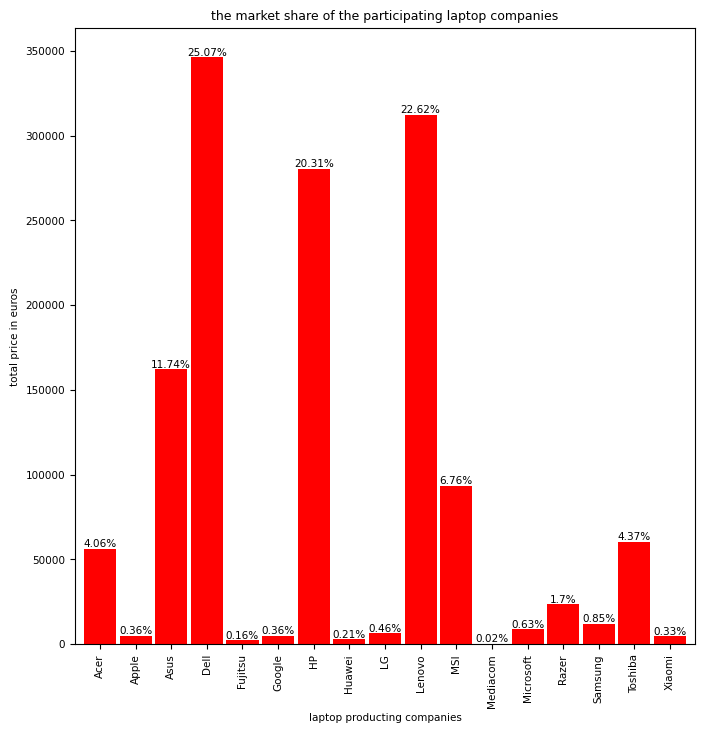

In [371]:
labels = df_share['percentage']
plot = df.groupby('Company')['Price_euros'].sum().plot(kind = 'bar', rot = 90, figsize = (8,8), width = 0.9, color = 'r')
plt.rcParams.update({'font.size': 7.5})
for container in plot.containers:
    plot.bar_label(container, labels = labels)
plt.xlabel('laptop producting companies')
plt.ylabel('total price in euros')
plt.title('the market share of the participating laptop companies')
plt.show()

from the above, it's obvious that Dell took the largest share of the market, followed by lenovo and the HP. The question now is why? To answer this question, let's gain more insights into the data

Let's consider the number of products each have

In [11]:
df_prod = df.groupby('Company')['Product'].count().to_frame()

In [12]:
df_prod

,Product
Company,
Acer,77
Apple,4
Asus,126
Dell,284
Fujitsu,3
Google,3
HP,252
Huawei,2
LG,3


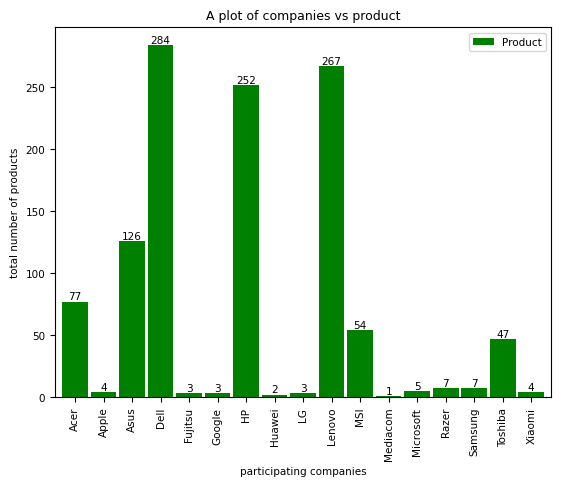

In [13]:
labels = df_prod['Product']
ax = df_prod.plot(kind = 'bar', color = 'g', width = 0.9)
for container in ax.containers:
    ax.bar_label(container, labels = labels)
plt.xlabel('participating companies')
plt.ylabel('total number of products')
plt.title('A plot of companies vs product')
plt.show()

Obviously, the more the number of company's products, the higher the market share! Dell has the highest number of products, followed by lenovo and then HP

### would that be all?
obviously, NO. let's explore the effect of disk type on the market share

We have two disk types, HDD and SSD and a close look at the data, we will se that some companies have both SSD and HDD in a device. Therefore, we will have to partition them in the dataset as 'single' for only either HDD or SSD, 'both' for SSD and HDD

In [351]:
df.loc[(df['SSD']>0) | (df['HDD']>0), 'type'] = 'single'
df.loc[(df['SSD']>0) & (df['HDD']>0), 'type'] = 'both'

In [352]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros,type
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.00,single
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.00,single
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.00,single
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.00,single
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.90,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,NaN,805.99,single
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,NaN,720.32,single
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,NaN,638.00,single
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,NaN,1499.00,single


In [353]:
df[df['type'] == 'both'][['SSD', 'HDD']]

,SSD,HDD
10,128,1
19,128,1
23,256,1
28,256,1
37,256,2
...,...,...
1099,128,1
1106,256,1
1108,256,1
1114,128,1


In [354]:
df_type = df.groupby('Company')['type'].value_counts().to_frame()

In [355]:
df_type.rename({'type':'qty'}, axis = 1, inplace = True)

In [356]:
df_type.reset_index(inplace = True)

In [357]:
both = df_type[df_type['type'] == 'both'][['Company', 'qty']]
single = df_type[df_type['type'] == 'single'][['Company', 'qty']]

In [358]:
df_type

,Company,type,qty
0,Acer,single,71
1,Acer,both,6
2,Asus,single,72
3,Asus,both,53
4,Dell,single,232
5,Dell,both,50
6,Fujitsu,single,3
7,Google,single,3
8,HP,single,234
9,HP,both,15


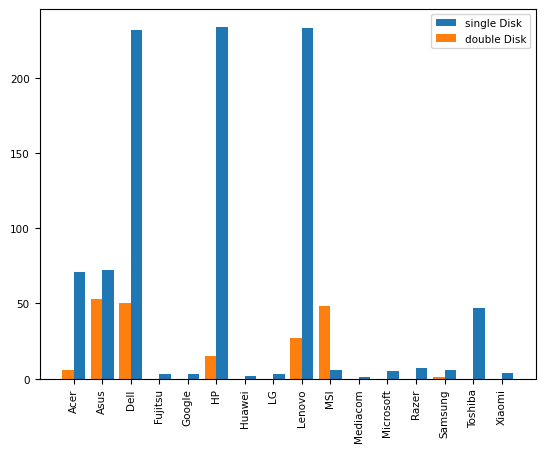

In [359]:
plt.bar(single['Company'], single['qty'], width = 0.4, align = 'edge', label = 'single Disk')
plt.bar(both['Company'], both['qty'], width = -0.4, align = 'edge',label = 'double Disk')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

from the above, more customers bought single hard drive than the combined ones. More customers bought double hard disk laptops from dell, Asus and MSI.

In [27]:
complist = df_type['Company'].tolist()

In [58]:
for i in range(len(complist)):
    if complist[i] == 'Toshiba':
        complist[i] = 15

In [59]:
complist

[1, 1, 2, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 11, 12, 13, 14, 14, 15, 16]

In [60]:
df_type['company'] = complist

In [61]:
df_type

,Company,type,qty,company
0,Acer,single,71,1
1,Acer,both,6,1
2,Asus,single,72,2
3,Asus,both,53,2
4,Dell,single,232,3
5,Dell,both,50,3
6,Fujitsu,single,3,4
7,Google,single,3,5
8,HP,single,234,6
9,HP,both,15,6


### Which ram size has the largest market share and coming from which company?

To carryout this study, let us pay more attention to the top5 selling companies which include Dell, HP, Lenovo, Acer and Asus

In [224]:
df_ram = df.groupby('Company')['Ram'].value_counts().to_frame()

In [303]:
x1 = ['Dell','HP','Lenovo','Acer','Asus']

In [235]:
GB4 = [54, 77, 65, 34, 20]
GB6 = [4, 18, 13, 3, 2]
GB8 = [160, 139, 140, 33, 59]
GB12 = [5, 6, 13, 3, 5]
GB16 = [54, 12, 39,4, 35]

In [231]:
x = np.arange(len(x))

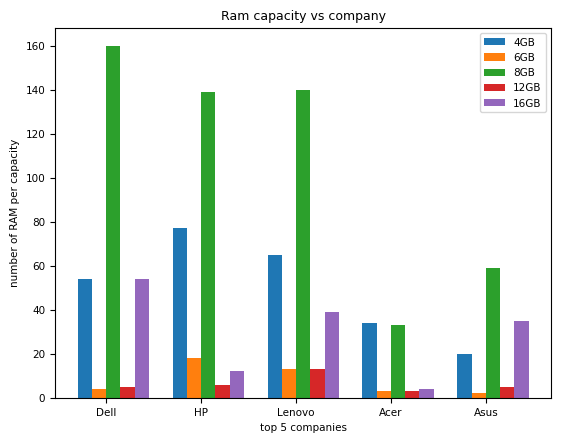

In [350]:
plt.bar(x+0.1,GB4,width = 0.15, label = '4GB',align = 'edge')
plt.bar(x+0.25,GB6, width = 0.15,label = '6GB',align = 'edge')
plt.bar(x+0.4,GB8, width = 0.15,label = '8GB',align = 'edge')
plt.bar(x+0.55,GB12, width = 0.15,label = '12GB',align = 'edge')
plt.bar(x+0.7,GB16, width = 0.15,label = '16GB',align = 'edge')
plt.xlabel('top 5 companies')
plt.ylabel('number of RAM per capacity')
plt.title('Ram capacity vs company')
plt.xticks(x+0.4,x1)
plt.legend()
plt.show()

from the ongoing, it seems that more customers by 8GB ram laptops more than the rest. For HP laptops, 4GB ram capacity sells more other 4GB ram capacity. Customers equally buy same number of 16GB ram as 4GB ram and dell 16GB ram sells more than other laptops.

In [363]:
len(df['Inches'].unique())

15

In [362]:
df.groupby('Company')['Inches'].value_counts()

Company    Inches
Acer       15.6       54
           17.3        9
           14.0        8
           13.3        6
Apple      12.0        4
Asus       15.6       59
           17.3       38
           14.0       14
           13.3       13
           12.5        2
Dell       15.6      177
           13.3       48
           17.3       28
           14.0       21
           12.5        8
           11.6        1
           15.0        1
Fujitsu    15.6        3
Google     12.3        3
HP         15.6      121
           14.0       42
           13.3       38
           17.3       34
           12.5       16
           17.0        1
Huawei     13.0        2
LG         15.6        2
           14.0        1
Lenovo     15.6      143
           14.0       65
           13.3       22
           17.3       21
           12.5        9
           13.9        6
           11.3        1
MSI        17.3       27
           15.6       24
           14.0        2
           18.4        1
Mediaco